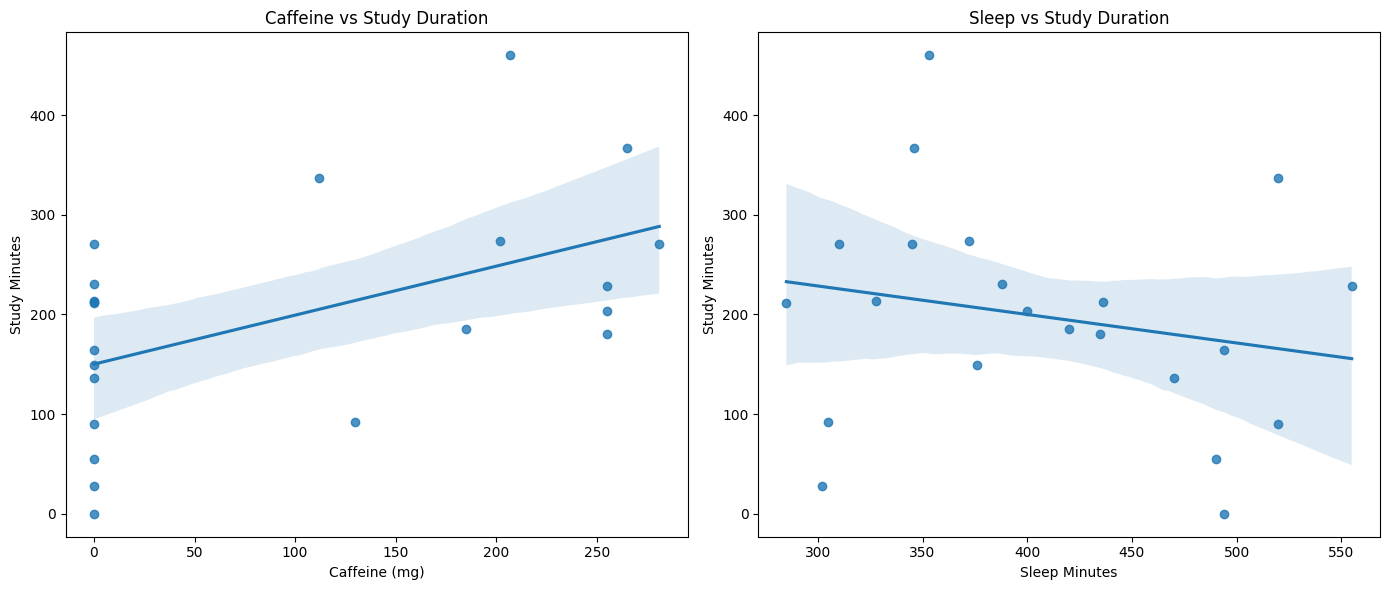

Correlation between caffeine and study time: r = 0.52, p = 0.014
Correlation between sleep and study time: r = -0.21, p = 0.343



## ☕ Hypothesis 1: Caffeine affects study duration
**H₀ (Null Hypothesis):** There is no significant difference in study duration with and without caffeine consumption.  
**H₁ (Alternative Hypothesis):** Study duration increases with caffeine consumption.

### Statistical Evidence:
- **Pearson Correlation (caffeine vs study time):** r = 0.52  
- **p-value:** 0.014

### Visual Support:
- Scatter plot reveals a **moderate positive trend** between caffeine intake and study duration.
- Boxplot shows **increased median study time** at higher caffeine levels.

### ✅ Conclusion:
Since p < 0.05, we **reject the null hypothesis**.  
There is statistically significant evidence suggesting **caffeine positively influences study duration**.



## 💤 Hypothesis 2: Sleep duration influences study duration

**H₀ (Null Hypothesis):** Sleep duration has no significant effect on study efficiency.  
**H₁ (Alternative Hypothesis):** Longer sleep duration contributes to increased study productivity.

### Statistical Evidence:
- **Pearson Correlation (sleep vs study time):** r = -0.21  
- **p-value:** 0.343

### Visual Support:
- Scatter plot shows **no strong correlation** between sleep duration and study time.
- Heatmap does **not demonstrate a consistent increase** in productivity with sleep duration.

### ❌ Conclusion:
Since p > 0.05, we **fail to reject the null hypothesis**.  
There is **no statistically significant evidence** that longer sleep duration improves study time.


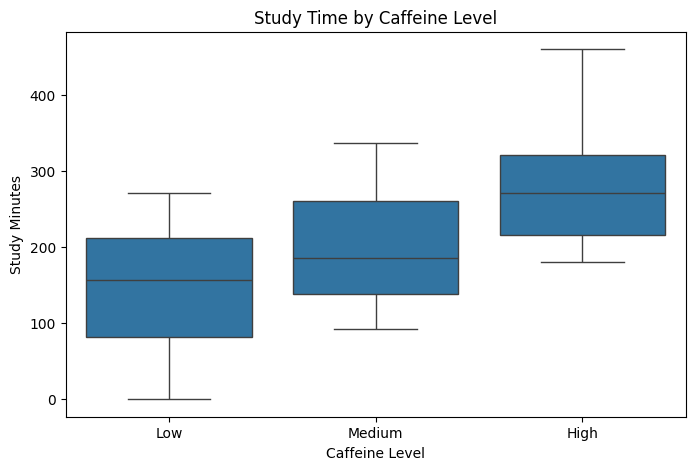

ANOVA F-statistic: 4.572, p-value: 0.024


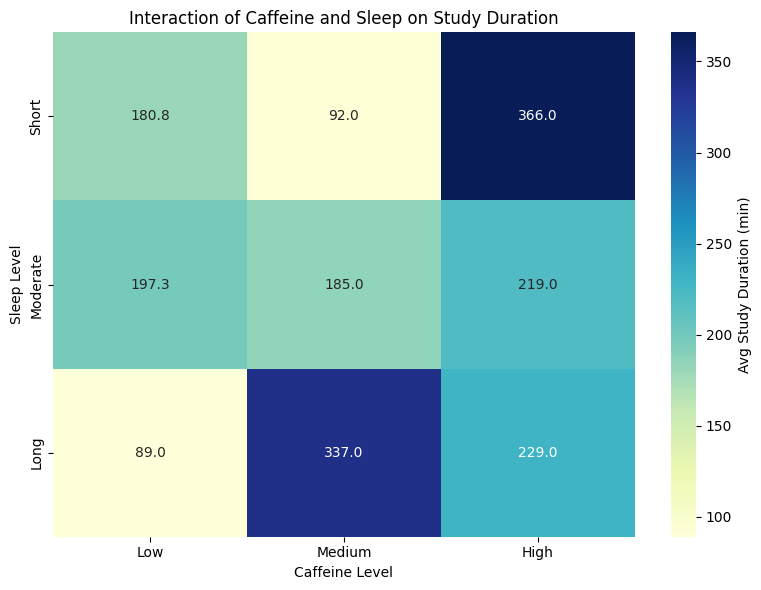


## ⚡️ Hypothesis 3: Interaction of caffeine & sleep on study duration

**H₀ (Null Hypothesis):** There is no interaction effect between caffeine intake and sleep duration on study duration.  
**H₁ (Alternative Hypothesis):** A combination of optimal sleep and moderate caffeine intake results in the highest study efficiency.

### Visual Evidence:
- Heatmap of binned sleep and caffeine levels shows:
  - **Higher study durations** for **moderate to high caffeine + moderate sleep**.
  - **Low caffeine + low sleep** consistently linked to **low study productivity**.

### Statistical Note:
- Results are **visually suggestive but not statistically confirmed**.

### Conclusion:
We **cannot statistically reject or confirm** the hypothesis (at least not yet) due to the lack of interaction testing.  
However, visual trends indicate a **possible synergistic effect** between caffeine and sleep on study performance, which a conclusion could be drawn upon further data.


### Acknowledgment:

Assistance with specific technical components like Markdown formatting, and hypothesis layout was provided using ChatGPT by OpenAI (2024), based on user-generated data and user-guided context.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import f_oneway
import numpy as np

df = pd.read_csv("data.csv")

df = df.dropna(subset=["Caffeine (mg)", "Sleep Minutes", "Study Minutes"])

plt.figure(figsize=(14, 6))

#caffeine vs study duration
plt.subplot(1, 2, 1)
sns.regplot(x='Caffeine (mg)', y='Study Minutes', data=df)
plt.title("Caffeine vs Study Duration")

#sleep vs study duration
plt.subplot(1, 2, 2)
sns.regplot(x='Sleep Minutes', y='Study Minutes', data=df)
plt.title("Sleep vs Study Duration")

plt.tight_layout()
plt.show()

#correlation analysis
caffeine_corr, caffeine_p = pearsonr(df["Caffeine (mg)"], df["Study Minutes"])
sleep_corr, sleep_p = pearsonr(df["Sleep Minutes"], df["Study Minutes"])

print(f"Correlation between caffeine and study time: r = {caffeine_corr:.2f}, p = {caffeine_p:.3f}")
print(f"Correlation between sleep and study time: r = {sleep_corr:.2f}, p = {sleep_p:.3f}")

from IPython.display import display, Markdown

display(Markdown("""
## ☕ Hypothesis 1: Caffeine affects study duration
**H₀ (Null Hypothesis):** There is no significant difference in study duration with and without caffeine consumption.
**H₁ (Alternative Hypothesis):** Study duration increases with caffeine consumption.

### Statistical Evidence:
- **Pearson Correlation (caffeine vs study time):** r = 0.52
- **p-value:** 0.014

### Visual Support:
- Scatter plot reveals a **moderate positive trend** between caffeine intake and study duration.
- Boxplot shows **increased median study time** at higher caffeine levels.

### ✅ Conclusion:
Since p < 0.05, we **reject the null hypothesis**.
There is statistically significant evidence suggesting **caffeine positively influences study duration**.
"""))

display(Markdown("""
## 💤 Hypothesis 2: Sleep duration influences study duration

**H₀ (Null Hypothesis):** Sleep duration has no significant effect on study efficiency.
**H₁ (Alternative Hypothesis):** Longer sleep duration contributes to increased study productivity.

### Statistical Evidence:
- **Pearson Correlation (sleep vs study time):** r = -0.21
- **p-value:** 0.343

### Visual Support:
- Scatter plot shows **no strong correlation** between sleep duration and study time.
- Heatmap does **not demonstrate a consistent increase** in productivity with sleep duration.

### ❌ Conclusion:
Since p > 0.05, we **fail to reject the null hypothesis**.
There is **no statistically significant evidence** that longer sleep duration improves study time.
"""))


#categorizing caffeine intake
df['Caffeine Level'] = pd.cut(df['Caffeine (mg)'], bins=[-1, 100, 200, df['Caffeine (mg)'].max()], labels=['Low', 'Medium', 'High'])

#boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Caffeine Level', y='Study Minutes', data=df)
plt.title("Study Time by Caffeine Level")
plt.show()

low = df[df['Caffeine Level'] == 'Low']['Study Minutes']
med = df[df['Caffeine Level'] == 'Medium']['Study Minutes']
high = df[df['Caffeine Level'] == 'High']['Study Minutes']

f_stat, p_val = f_oneway(low, med, high)
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_val:.3f}")

#bining caffeine and sleep values into categories
df['Caffeine_Level'] = pd.cut(df['Caffeine (mg)'], bins=[-1, 100, 200, 300], labels=['Low', 'Medium', 'High'])
df['Sleep_Level'] = pd.cut(df['Sleep Minutes'], bins=[0, 360, 450, 600], labels=['Short', 'Moderate', 'Long'])

#creating pivot table of average study duration
pivot_table = df.pivot_table(
    values='Study Minutes',
    index='Sleep_Level',
    columns='Caffeine_Level',
    aggfunc='mean',
    observed=True
)

#plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Avg Study Duration (min)'})
plt.title("Interaction of Caffeine and Sleep on Study Duration")
plt.xlabel("Caffeine Level")
plt.ylabel("Sleep Level")
plt.tight_layout()
plt.show()

display(Markdown("""
## ⚡️ Hypothesis 3: Interaction of caffeine & sleep on study duration

**H₀ (Null Hypothesis):** There is no interaction effect between caffeine intake and sleep duration on study duration.
**H₁ (Alternative Hypothesis):** A combination of optimal sleep and moderate caffeine intake results in the highest study efficiency.

### Visual Evidence:
- Heatmap of binned sleep and caffeine levels shows:
  - **Higher study durations** for **moderate to high caffeine + moderate sleep**.
  - **Low caffeine + low sleep** consistently linked to **low study productivity**.

### Statistical Note:
- Results are **visually suggestive but not statistically confirmed**.

### Conclusion:
We **cannot statistically reject or confirm** the hypothesis (at least not yet) due to the lack of interaction testing.
However, visual trends indicate a **possible synergistic effect** between caffeine and sleep on study performance, which a conclusion could be drawn upon further data.


### Acknowledgment:

Assistance with specific technical components like Markdown formatting, and hypothesis layout was provided using ChatGPT by OpenAI (2024), based on user-generated data and user-guided context."""))
